In [11]:
import yaml
import pypsa
import warnings
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
import os
import xarray as xr
import cartopy

In [12]:
# change current directory to parent folder
import os
import sys

if not os.path.isdir("pypsa-earth"):
    os.chdir("../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")

In [13]:
PARENT = os.path.realpath("pypsa-earth/") + "/"
config = yaml.safe_load(open(PARENT + "config.yaml"))

# Read config.yaml settings:
name = config["run"]["name"]
simpl = config["scenario"]["simpl"]
clusters = config["scenario"]["clusters"]
ll = config["scenario"]["ll"]
opts = config["scenario"]["opts"]

# Ensure elements are strings and properly joined
simpl_str = "_".join(map(str, simpl))
clusters_str = "_".join(map(str, clusters))
ll_str = "_".join(map(str, ll))
opts_str = "_".join(map(str, opts))

nc_file_name = f"elec_s{simpl_str}_{clusters_str}_ec_l{ll_str}_{opts_str}.nc"
scenario_name = name 
scenario_subpath = scenario_name + "/" if scenario_name else ""

# Network file
results_path = PARENT + f"results/{scenario_subpath}networks/{nc_file_name}"
network_path = PARENT + f"networks/{scenario_subpath}elec.nc"
# Country shape file
regions_onshore_path = PARENT + f"resources/{scenario_subpath}shapes/country_shapes.geojson"
# Renewable profile file
solar_path = PARENT + f"resources/{scenario_subpath}renewable_profiles/profile_solar.nc"
onwind_path = PARENT + f"resources/{scenario_subpath}renewable_profiles/profile_onwind.nc"

In [14]:
warnings.simplefilter(action='ignore', category=FutureWarning)
n = pypsa.Network(results_path)
regions_onshore = gpd.read_file(regions_onshore_path)
country_coordinates = regions_onshore.total_bounds[[0, 2, 1, 3]]
warnings.simplefilter(action='default', category=FutureWarning)

INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [21]:
solved_network = "C:/Users/Javan002/pypsa-earth/results/networks/elec_s_10_ec_lcopt_Co2L-3H.nc"
n_solve = pypsa.Network(solved_network)

C:\Users\Javan002\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
C:\Users\Javan002\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
C:\Users\Javan002\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype in

In [22]:
n = n_solve

C:\Users\Javan002\miniconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x200c02a08e0>,
 <matplotlib.collections.LineCollection at 0x200c02d6740>)

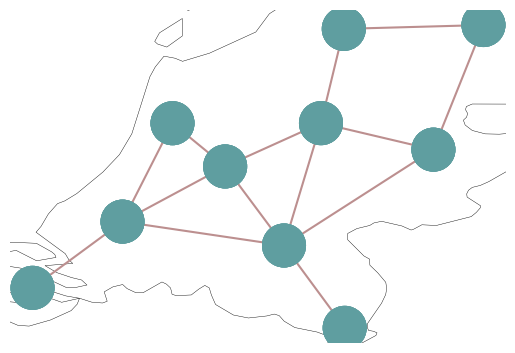

In [23]:
n.plot()

In [25]:
n.generators.p_nom_opt.head() 

Generator
NL0 0 CCGT           808.00000
NL0 0 csp              0.00000
NL0 0 offwind-ac     101.07100
NL0 0 offwind-dc       1.69284
NL0 0 onwind        1204.98000
Name: p_nom_opt, dtype: float64

In [26]:
n.statistics._parent

PyPSA Network
Components:
 - Bus: 40
 - Carrier: 19
 - Generator: 72
 - GlobalConstraint: 1
 - Line: 14
 - Link: 50
 - Load: 10
 - Store: 30
Snapshots: 72

In [28]:
n.lines.head()

,bus0,bus1,num_parallel,length,carrier,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,NL0 0,NL0 3,1.736842,74.873284,AC,Al/St 240/40 4-bundle 380.0,0.7,2949.336115,3087.326064,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,NL0 0,NL0 5,2.171053,85.060826,AC,Al/St 240/40 4-bundle 380.0,0.7,3686.670144,3506.884963,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,NL0 1,NL0 2,10.184211,91.669852,AC,Al/St 240/40 4-bundle 380.0,0.7,17293.834493,3779.363744,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,NL0 1,NL0 4,6.592105,92.003684,AC,Al/St 240/40 4-bundle 380.0,0.7,11194.071164,3793.150884,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,NL0 1,NL0 7,6.592105,77.307011,AC,Al/St 240/40 4-bundle 380.0,0.7,11194.071164,3188.320293,True,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [30]:
n.generators.head()

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,bus,carrier,...,q_set,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
NL0 0 CCGT,inf,0.000000,808.000000,99027.729293,0.58,808.000000,38.864925,False,NL0 0,CCGT,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NL0 0 csp,5850.001723,61.811555,0.000000,8989.205505,1.00,0.000000,0.010919,False,NL0 0 csp,csp,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NL0 0 offwind-ac,1427.456220,783.518377,101.071410,189367.622726,1.00,101.071410,0.024975,True,NL0 0,offwind-ac,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NL0 0 offwind-dc,23.579684,13.126013,1.692845,202758.093634,1.00,1.692845,0.024632,True,NL0 0,offwind-dc,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NL0 0 onwind,1204.977097,596.659208,592.302623,96085.888020,1.00,592.302623,0.024653,True,NL0 0,onwind,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [31]:
n.storage_units.head()

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,


In [32]:
n.stores.head()

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,marginal_cost,build_year,type,e_nom,e_nom_min,...,e_initial,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,marginal_cost_quadratic,standing_loss,lifetime,e_nom_opt
Store,,,,,,,,,,,,,,,,,,,,,
NL0 0 H2,NL0 0 H2,H2,True,True,1399.025482,0.010410,0,,0.0,0.0,...,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf,0.0
NL0 1 H2,NL0 1 H2,H2,True,True,1399.025482,0.010190,0,,0.0,0.0,...,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf,0.0
NL0 2 H2,NL0 2 H2,H2,True,True,1399.025482,0.010049,0,,0.0,0.0,...,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf,0.0
NL0 3 H2,NL0 3 H2,H2,True,True,1399.025482,0.009030,0,,0.0,0.0,...,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf,0.0
NL0 4 H2,NL0 4 H2,H2,True,True,1399.025482,0.010012,0,,0.0,0.0,...,0.0,False,True,0.0,0.0,1.0,0.0,0.0,inf,0.0


In [33]:
n.loads.head()

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
NL0 0,NL0 0,,,0.0,0.0,-1.0
NL0 1,NL0 1,,,0.0,0.0,-1.0
NL0 2,NL0 2,,,0.0,0.0,-1.0
NL0 3,NL0 3,,,0.0,0.0,-1.0
NL0 4,NL0 4,,,0.0,0.0,-1.0


In [35]:
n.loads_t.p_set.head()

Load,NL0 0,NL0 1,NL0 2,NL0 3,NL0 4,NL0 5,NL0 6,NL0 7,NL0 8,NL0 9
snapshot,,,,,,,,,,
2013-01-01 00:00:00,450.382565,2953.007054,1733.323131,612.010512,1733.174280,853.026578,1437.967039,301.165214,1240.704224,891.920167
2013-01-01 03:00:00,482.315625,3162.381393,1856.219344,655.403330,1856.059939,913.507936,1539.921891,322.518454,1328.672733,955.159160
2013-01-01 06:00:00,619.295779,4060.514208,2383.395322,841.541295,2383.190646,1172.948956,1977.267743,414.115378,1706.022721,1226.429345
2013-01-01 09:00:00,641.835630,4208.300431,2470.141231,872.169980,2469.929105,1215.639533,2049.232257,429.187495,1768.115018,1271.066392
2013-01-01 12:00:00,643.487560,4219.131578,2476.498776,874.414734,2476.286104,1218.768295,2054.506485,430.292120,1772.665718,1274.337809


<AxesSubplot:xlabel='snapshot', ylabel='MW'>

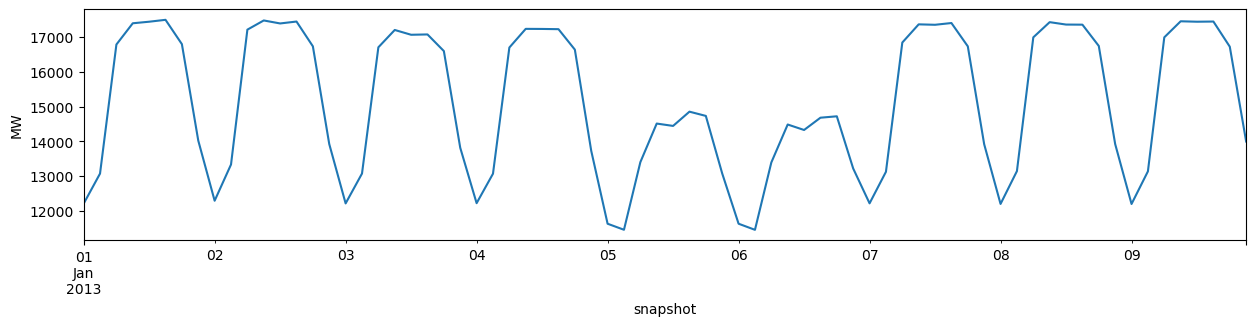

In [36]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

In [38]:
n.generators_t.p_max_pu.head()

Generator,NL0 0 csp,NL0 0 offwind-ac,NL0 0 offwind-dc,NL0 0 onwind,NL0 0 solar,NL0 1 csp,NL0 1 offwind-ac,NL0 1 offwind-dc,NL0 1 onwind,NL0 1 solar,...,NL0 7 offwind-ac,NL0 7 offwind-dc,NL0 7 onwind,NL0 7 solar,NL0 8 csp,NL0 8 onwind,NL0 8 solar,NL0 9 csp,NL0 9 onwind,NL0 9 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.000000,0.794902,0.738842,0.961300,0.000000,0.000000,0.879319,0.828515,0.987923,0.000000,...,0.883460,0.884366,0.990624,0.000000,0.000000,0.977968,0.000000,0.000000,0.995590,0.00000
2013-01-01 03:00:00,0.000000,0.387917,0.375959,0.552355,0.000000,0.000000,0.439581,0.411966,0.692758,0.000000,...,0.536944,0.513452,0.705265,0.000000,0.000000,0.637362,0.000000,0.000000,0.917797,0.00000
2013-01-01 06:00:00,0.000000,0.322402,0.387161,0.254782,0.000000,0.000000,0.479498,0.636589,0.375915,0.000000,...,0.456438,0.521064,0.382291,0.000000,0.000000,0.262034,0.000000,0.000000,0.752100,0.00000
2013-01-01 09:00:00,0.023044,0.548397,0.665469,0.357097,0.054908,0.012566,0.561814,0.749800,0.372604,0.034892,...,0.498498,0.569747,0.425753,0.059203,0.000000,0.336285,0.017101,0.000000,0.422333,0.00000
2013-01-01 12:00:00,0.101176,0.733851,0.820454,0.565702,0.195543,0.132530,0.682434,0.830974,0.443232,0.245444,...,0.601142,0.686044,0.491034,0.265864,0.113052,0.419090,0.213790,0.034423,0.307811,0.08361


<AxesSubplot:xlabel='snapshot'>

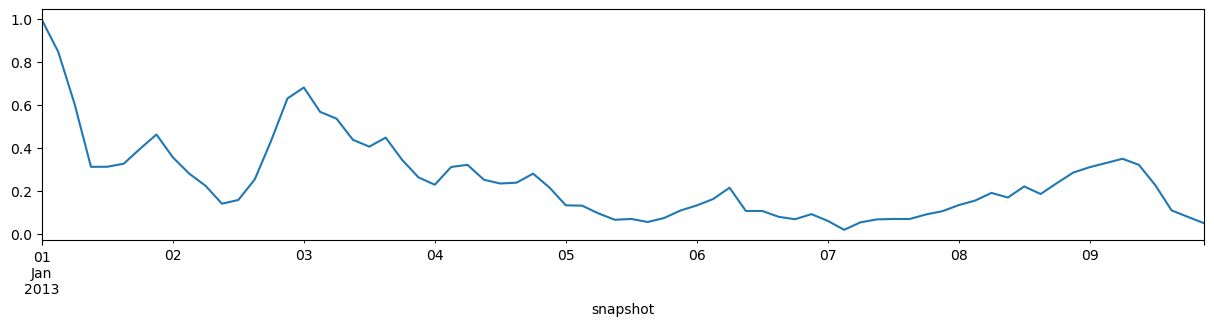

In [41]:
n.generators_t.p_max_pu.loc["2013-01", "NL0 2 onwind"].plot(figsize=(15,3))

<AxesSubplot:xlabel='snapshot'>

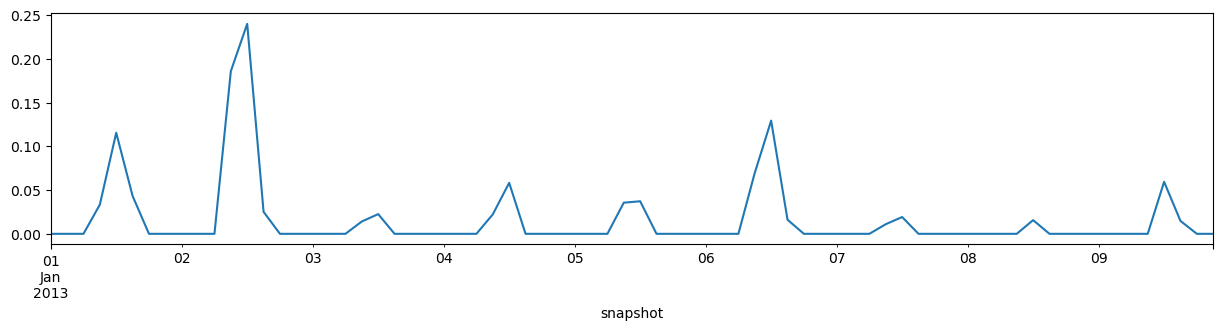

In [45]:
n.generators_t.p_max_pu.loc["2013-01", "NL0 3 solar"].plot(figsize=(15,3))

In [46]:
n.objective / 1e9

3.177761323

In [47]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5) # optimized line capacity compared to original capacity

Line
1    0.003885
2   -0.000144
3   -0.034493
4    0.028836
5    0.028836
dtype: float64

In [48]:
n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 # GW

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

carrier
CCGT          1.832952e+01
biomass       5.440000e-01
coal          5.697166e+00
csp           0.000000e+00
load          1.000000e+07
nuclear       5.150000e-01
offwind-ac    7.218804e-01
offwind-dc    1.737077e+00
oil           3.242174e-01
onwind        9.422012e+00
solar         1.110622e+01
Name: p_nom_opt, dtype: float64

In [49]:
n.storage_units.groupby("carrier").p_nom_opt.sum() / 1e3 # GW

Series([], Name: p_nom_opt, dtype: float64)

<AxesSubplot:xlabel='snapshot'>

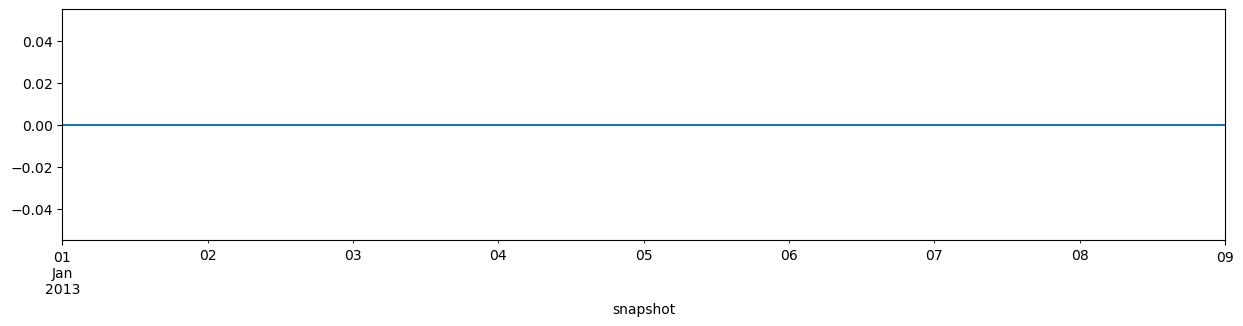

In [50]:
(n.storage_units_t.state_of_charge.sum(axis=1).resample('D').mean() / 1e6).plot(figsize=(15,3)) #TWh

In [51]:
n.statistics()

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

Capacity Factor  Capital Expenditure  \
          carrier                                                    
Generator Biomass                9.993248e-01         1.512772e+08   
          Coal                   9.448492e-01         1.993875e+09   
          Combined-Cycle Gas     1.957129e-01         1.815131e+09   
          Csp                             NaN         0.000000e+00   
          Nuclear                1.000000e+00         3.639879e+08   
          Offshore Wind (AC)     4.841742e-01         1.353001e+08   
          Offshore Wind (DC)     5.186962e-01         3.591605e+08   
          Oil                    0.000000e+00         1.227838e+07   
          Onshore Wind           3.886061e-01         9.053224e+08   
          Solar                  1.818368e-02         3.954045e+08   
          load                   1.373715e-20         0.000000e+00   
Line      AC                     4.907469e-02         5.229621e+08   
Link      Csp                             NaN         0.000000e+00   
          H2 electrolysis                 NaN         0.000000e+00   
          H2 fuel cell                    NaN         0.000000e+00   
          battery charger                 NaN         0.000000e+00   
          battery discharger              NaN         0.000000e+00   
Load      -                               NaN                  NaN   
Store     Battery Storage                 NaN         0.000000e+00   
          Csp                             NaN         0.000000e+00   
          Hydrogen Storage                NaN         0.000000e+00   

                              Curtailment      Dispatch  Installed Capacity  \
          carrier                                                             
Generator Biomass                0.000000  4.762222e+06        5.440000e+02   
          Coal                   0.000000  4.715476e+07        5.697166e+03   
          Combined-Cycle Gas     0.000000  3.142496e+07        1.832952e+04   
          Csp                    0.000000  0.000000e+00        0.000000e+00   
          Nuclear                0.000000  4.511400e+06        5.150000e+02   
          Offshore Wind (AC)     1.707290  3.061759e+06        7.218809e+02   
          Offshore Wind (DC)    16.754598  7.892891e+06        1.737073e+03   
          Oil                    0.000000  0.000000e+00        3.242174e+02   
          Onshore Wind          40.513018  3.207432e+07        4.188231e+03   
          Solar                  3.559818  1.769100e+06        1.110622e+04   
          load                   0.000000  5.394445e-10        1.000000e+10   
Line      AC                          NaN -1.289099e+07        1.534995e+05   
Link      Csp                         NaN           NaN        0.000000e+00   
          H2 electrolysis             NaN           NaN        0.000000e+00   
          H2 fuel cell                NaN           NaN        0.000000e+00   
          battery charger             NaN           NaN        0.000000e+00   
          battery discharger          NaN           NaN        0.000000e+00   
Load      -                           NaN -1.326514e+08                 NaN   
Store     Battery Storage             NaN  0.000000e+00        0.000000e+00   
          Csp                         NaN  0.000000e+00        0.000000e+00   
          Hydrogen Storage            NaN  0.000000e+00        0.000000e+00   

                              Market Value  Operational Expenditure  \
          carrier                                                     
Generator Biomass                37.363095             7.097371e+07   
          Coal                   38.077049             1.330081e+09   
          Combined-Cycle Gas     38.865271             1.221319e+09   
          Csp                          NaN             0.000000e+00   
          Nuclear                37.347930             5.138120e+07   
          Offshore Wind (AC)     36.380866             7.667932e+04   
          Offshore Wind (DC)     

<AxesSubplot:xlabel='carrier', ylabel='Euros'>

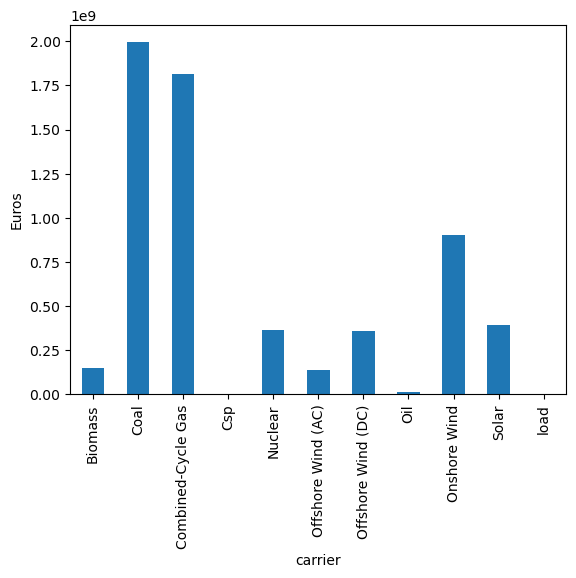

In [52]:
n.statistics()["Capital Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")

C:\Users\Javan002\miniconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(3.779740684210526, 6.965325631578946, 51.0991447368421, 53.23855100250628)

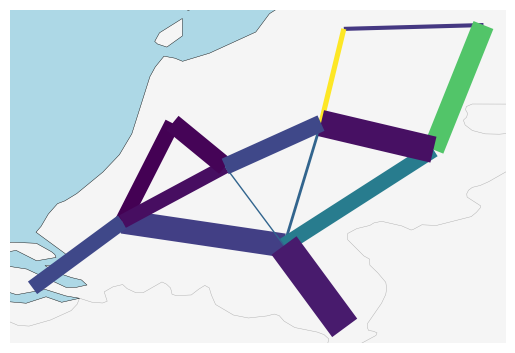

In [53]:
loading = (n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)
# Example types of projections: PlateCarree, Mercator, Orthographic
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
n.plot(ax=ax,
    bus_colors='gray',
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3,
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0
)
ax.axis('off')

In [57]:
warnings.simplefilter(action='ignore', category=FutureWarning)
n = pypsa.Network(results_path)
regions_onshore = gpd.read_file(regions_onshore_path)
country_coordinates = regions_onshore.total_bounds[[0, 2, 1, 3]]
warnings.simplefilter(action='default', category=FutureWarning)

INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


Text(0.5, 1.0, 'NL')

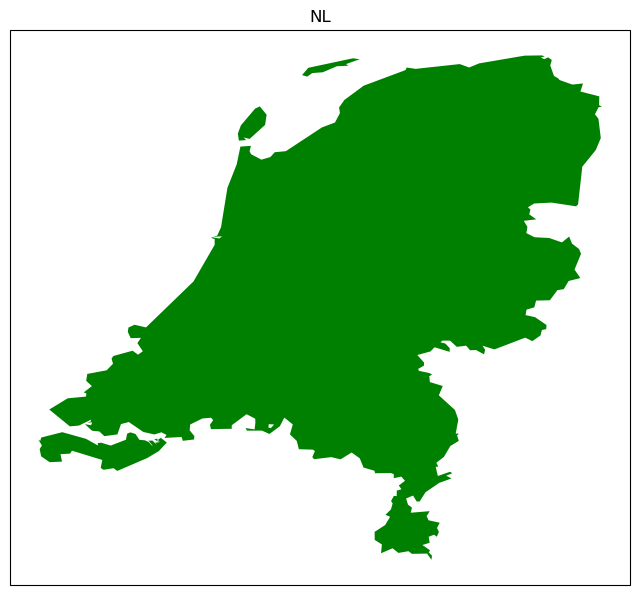

In [58]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(n.buses.x.mean())})
with plt.rc_context({"patch.linewidth": 0.}):
    regions_onshore.plot(
    ax=ax,
    facecolor="green",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
    )
ax.set_title(", ".join(regions_onshore.name.values))

In [59]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 40 entries
Component 'Carrier' has 19 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 14 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 50 entries
Component 'Load' has 10 entries
Component 'Generator' has 72 entries
Component 'Store' has 30 entries


In [60]:
print(n.snapshots)
print(f"Time steps: " + str(len(n.snapshots)))

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 03:00:00',
               '2013-01-01 06:00:00', '2013-01-01 09:00:00',
               '2013-01-01 12:00:00', '2013-01-01 15:00:00',
               '2013-01-01 18:00:00', '2013-01-01 21:00:00',
               '2013-01-02 00:00:00', '2013-01-02 03:00:00',
               '2013-01-02 06:00:00', '2013-01-02 09:00:00',
               '2013-01-02 12:00:00', '2013-01-02 15:00:00',
               '2013-01-02 18:00:00', '2013-01-02 21:00:00',
               '2013-01-03 00:00:00', '2013-01-03 03:00:00',
               '2013-01-03 06:00:00', '2013-01-03 09:00:00',
               '2013-01-03 12:00:00', '2013-01-03 15:00:00',
               '2013-01-03 18:00:00', '2013-01-03 21:00:00',
               '2013-01-04 00:00:00', '2013-01-04 03:00:00',
               '2013-01-04 06:00:00', '2013-01-04 09:00:00',
               '2013-01-04 12:00:00', '2013-01-04 15:00:00',
               '2013-01-04 18:00:00', '2013-01-04 21:00:00',
               '2013-01-

<AxesSubplot:title={'center':'Generator capacity expansion in GW'}, xlabel='carrier'>

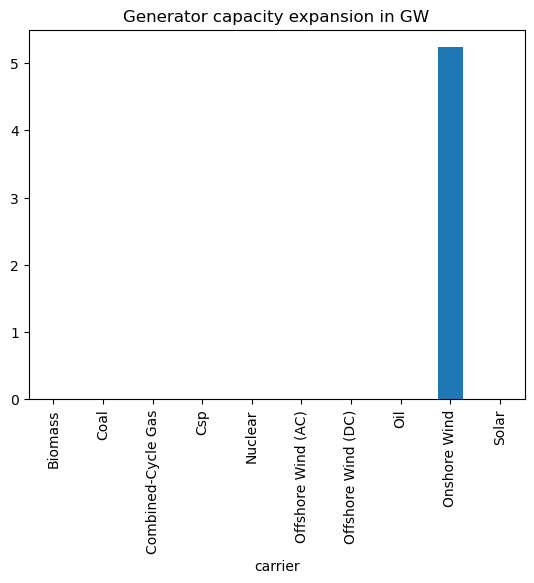

In [66]:
optimal_capacity = n.statistics.optimal_capacity(comps=["Generator"]).droplevel(0).div(1e3)
installed_capacity = n.statistics.installed_capacity(comps=["Generator"]).droplevel(0).div(1e3)
generation_capacity_expansion = optimal_capacity - installed_capacity
generation_capacity_expansion.drop(["load"], inplace=True)
generation_capacity_expansion.plot.bar(title="Generator capacity expansion in GW")

In [67]:
generation_capacity_expansion # In GW

carrier
Biomass               0.000000e+00
Coal                  0.000000e+00
Combined-Cycle Gas    0.000000e+00
Csp                   0.000000e+00
Nuclear               0.000000e+00
Offshore Wind (AC)   -5.313671e-07
Offshore Wind (DC)    3.381345e-06
Oil                   0.000000e+00
Onshore Wind          5.233781e+00
Solar                -3.268031e-06
dtype: float64

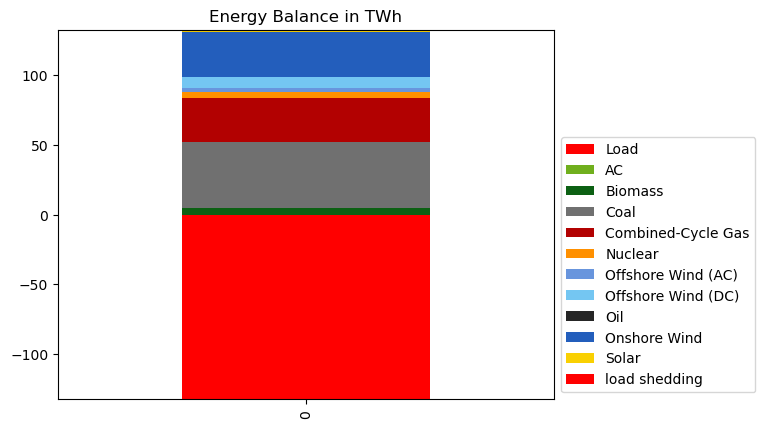

In [68]:
colors = {key.lower(): value.lower() for key, value in config["plotting"]["tech_colors"].items()}
nice_names = {value.lower(): key for key, value in config["plotting"]["nice_names"].items()}

rename_cols = {
    '-': 'Load',
    'load': 'load shedding',
}

energy_balance = (
    n.statistics.energy_balance()
    .loc[:, :, "AC"]
    .groupby("carrier")
    .sum()
    .div(1e6)
    .to_frame()
    .T
    .rename(columns=rename_cols)
)

# color-matching
color_list = []
for col in energy_balance.columns:
    original_name = col.lower()
    key_name = nice_names.get(original_name, original_name)
    color = colors.get(key_name.lower(), 'gray')
    color_list.append(color)


fig, ax = plt.subplots()
energy_balance.plot.bar(stacked=True, ax=ax, title="Energy Balance in TWh", color=color_list)
handles, labels = ax.get_legend_handles_labels()
nice_labels = [config["plotting"]["nice_names"].get(label, label) for label in energy_balance.columns]
ax.legend(handles, nice_labels, bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

plt.show()

In [69]:
n.statistics.energy_balance()/1e6 # In TWh

           carrier             bus_carrier
Line       AC                  AC             2.793968e-15
Generator  Biomass             AC             4.762222e+00
           Coal                AC             4.715476e+01
           Combined-Cycle Gas  AC             3.142496e+01
           Csp                 csp            0.000000e+00
           Nuclear             AC             4.511400e+00
           Offshore Wind (AC)  AC             3.061759e+00
           Offshore Wind (DC)  AC             7.892891e+00
           Oil                 AC             0.000000e+00
           Onshore Wind        AC             3.207432e+01
           Solar               AC             1.769100e+00
           load                AC             5.394445e-16
Store      Battery Storage     battery        0.000000e+00
           Csp                 csp            0.000000e+00
           Hydrogen Storage    H2             0.000000e+00
Load       -                   AC            -1.326514e+02
dtype: float6

In [70]:
solar = xr.open_dataset(solar_path)
wind = xr.open_dataset(onwind_path)

def plot_voronoi(n, carrier, voronoi, cmap, projection, title=None, filename=None):
    g = n.generators.loc[n.generators.carrier == carrier]
    br = gpd.read_file(f"{PARENT}resources/{scenario_name}/bus_regions/regions_{voronoi}.geojson").set_index("name")
    br_area = br.to_crs("ESRI:54009")
    br_area = br_area.geometry.area * 1e-6
    br["p_nom_max"] = g.groupby("bus").sum().p_nom_max / br_area

    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={"projection": projection})
    plt.rcParams.update({"font.size": 10})
    br.plot(
        ax=ax,
        column="p_nom_max",
        transform=ccrs.PlateCarree(),
        linewidth=0.25,
        edgecolor="k",
        cmap=cmap,
        vmin=0,
        vmax=br["p_nom_max"].max(),
        legend=True,
        legend_kwds={"label": r"potential density"},
    )
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS.with_scale("110m"))
    ax.set_extent(country_coordinates, crs=ccrs.PlateCarree()) 
    
    if title is not None:
        plt.title(title)

INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, links, loads, transformers


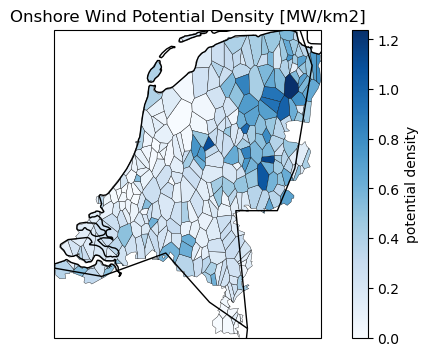

In [71]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plot_voronoi(
    pypsa.Network(network_path),
    "onwind",
    "onshore",
    "Blues",
    ccrs.PlateCarree(),
    title="Onshore Wind Potential Density [MW/km2]",
)
warnings.simplefilter(action='default', category=FutureWarning)